In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### 분류
- 모든 평가지표는 1에 가까울 수록 성능이 좋다고 판단한다.
- accuracy : 진짜 결과와 예측 결과를 비교해 얼마나 일치하는지.. 결과의 종류에 상관없이 전체를 보고 판단한다. 결과를 내기위한 결론 비율의 차이가 비슷한 경우도 있기 때문에 판단이 애매한 경우가 있을 수 있다.
- precision : 정밀도. 모델이 True라고 예측한것 중에 실제 True인 것의 비율. 각 결과 데이터별로 확인하기 때문에 정확도 보다는 신뢰성이 높다.
- recall : 재현율. 실제 True인 데이터를 모델이 True라고 예측한 비율. 각 결과 데이터 별로 확인하기 때문에 정확도 보다는 신뢰성이 높다.
- f1 score : 정밀도 재현율을 모두 이용하여 오차 값을 수정한것.
- roc_auc : 실제 false인 데이터를 true로 잘못 분류한 비율과 실제 True인 데이터 중에 True로 잘 분류한 비율을 각각 x, y 좌표로 설정하여 비율을 비교하는 그래프가 roc 곡선이다. 이 곡선의 면적을 계산한것이 auc이다. 그래프가 좌상쪽으로 있으면 최대 면적이 된다.
- 이진 분류(결과가 두 개인 경우)에는 roc_auc가 좀더 정밀하고 결과의 종류가 3가지 이상인 경우에는 f1 score가 좀더 정밀하다고 하지만 차이는 크지 않다.

In [2]:
df1 = pd.read_csv('data/forge.csv')
df1

,attr1,attr2,target
0,9.963466,4.596765,1
1,11.032954,-0.168167,0
2,11.541558,5.211161,1
3,8.692890,1.543220,0
4,8.106227,4.286960,0
5,8.309889,4.806240,1
6,11.930271,4.648663,1
7,9.672847,-0.202832,0
8,8.348103,5.134156,1
9,8.674947,4.475731,1


In [3]:
# 입력과 결과로 나눈다.
X = df1.drop('target', axis=1)
y = df1['target']

display(X)
display(y)

,attr1,attr2
0,9.963466,4.596765
1,11.032954,-0.168167
2,11.541558,5.211161
3,8.692890,1.543220
4,8.106227,4.286960
5,8.309889,4.806240
6,11.930271,4.648663
7,9.672847,-0.202832
8,8.348103,5.134156
9,8.674947,4.475731


0     1
1     0
2     1
3     0
4     0
5     1
6     1
7     0
8     1
9     1
10    1
11    1
12    0
13    0
14    1
15    1
16    1
17    0
18    0
19    1
20    0
21    0
22    0
23    0
24    1
25    0
Name: target, dtype: int64

In [4]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X, y)

LogisticRegression()

In [5]:
# 예측  결과를 가져온다.
y_pred = model1.predict(X)
y_pred

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0], dtype=int64)

In [6]:
# 정확도
r1 = accuracy_score(y, y_pred)
print(r1)

0.9230769230769231


In [7]:
# 정밀도
r2 = precision_score(y, y_pred)
r2

0.9230769230769231

In [8]:
# 재현율
r3 = recall_score(y, y_pred)
r3

0.9230769230769231

In [9]:
# f1 score
r4 = f1_score(y, y_pred)
r4

0.9230769230769231

In [10]:
# roc_auc
r5 = roc_auc_score(y, y_pred)
r5

0.9230769230769231

In [11]:
# 교차 검증
model2 = LogisticRegression()

kfold = KFold(n_splits=10, shuffle=True, random_state=1)

r1 = cross_val_score(model2, X, y, scoring='accuracy', cv=kfold)
r2 = cross_val_score(model2, X, y, scoring='precision', cv=kfold)
r3 = cross_val_score(model2, X, y, scoring='recall', cv=kfold)
r4 = cross_val_score(model2, X, y, scoring='f1', cv=kfold)
# r5 = cross_val_score(model2, X, y, scoring='roc_auc', cv=kfold)

print(r1.mean())
print(r2.mean())
print(r3.mean())
print(r4.mean())

0.9166666666666666
0.85
0.85
0.8333333333333333


In [13]:
# 동시 여러 지표를 이용해 평가를 할 경우
s1 = ['accuracy', 'f1']
r10 = cross_validate(model2, X, y, scoring=s1, cv=kfold)
print(r10['test_accuracy'].mean())
print(r10['test_f1'].mean())

0.9166666666666666
0.8333333333333333


### 회귀
- mean_squared_error : 진짜 결과 값과 예측 결과값 간의 거리를 측정하여 거리의 제곰을 계산하여 오차 면적을 구한다. 모든 데이터에 대한 오차 면적의 합을 구해 오차의 정도를 계산한다.
- neg_mean_squared_error : sklearn은 대부분의 평가 지표가 1에 가까울 수록 좋은 성능을 보인다고 평가한다. 이에 mean_squared_error는 오차가 심하면 값이 더 커지므로 음수로 변환하여 전달한다. 이를 통해 값으 크면 성능 좋다는 일관성을 유지해준다.
- r2 : 분산을 기반으로 평가
- neg_mean_squared_error는 예측 값과 결과 값이 얼마나 차이가 나는지를 보는 것이고 r2는 패턴이 얼마나 유산하지를 평가한다.

In [14]:
df1 = pd.read_csv('data/wave.csv')
df1.head()

,data,target
0,-0.752759,-0.448221
1,2.704286,0.331226
2,1.391964,0.779321
3,0.591951,0.034979
4,-2.063888,-1.387736


In [15]:
# 입력과 결과로 나눈다.
X = df1.drop('target', axis=1)
y = df1['target']

display(X)
display(y)

,data
0,-0.752759
1,2.704286
2,1.391964
3,0.591951
4,-2.063888
5,-2.064033
6,-2.651498
7,2.197057
8,0.606690
9,1.248435


0    -0.448221
1     0.331226
2     0.779321
3     0.034979
4    -1.387736
5    -2.471962
6    -1.527308
7     1.494172
8     1.000324
9     0.229562
10   -1.059796
11    0.778964
12    0.754188
13   -1.513697
14   -1.673034
15   -0.904970
16    0.084485
17   -0.527347
18   -0.541146
19   -0.340907
20    0.217782
21   -1.124691
22    0.372991
23    0.097563
24   -0.986181
25    0.966954
26   -1.134550
27    0.697986
28    0.436558
29   -0.956521
30    0.035279
31   -2.085817
32   -0.474110
33    1.537083
34    0.868933
35    1.876649
36    0.094526
37   -1.415024
38    0.254389
39    0.093989
Name: target, dtype: float64

In [16]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()

model1.fit(X, y)

LinearRegression()

In [17]:
# 예측
y_pred = model1.predict(X)
y_pred

array([-0.4247581 ,  1.241749  ,  0.60912948,  0.22347442, -1.05680237,
       -1.05687213, -1.34006639,  0.99723363,  0.2305796 ,  0.53994012,
       -1.4485276 ,  1.29726956,  0.89966396, -0.89390291, -0.98216101,
       -0.97759239, -0.62808534,  0.00972258, -0.25872207, -0.66572401,
        0.2616375 , -1.10459809, -0.66307602, -0.44841267, -0.18894382,
        0.76295139, -0.93053569, -0.02071088,  0.20541473, -1.37371387,
        0.24917706, -1.01484719, -1.31991244,  1.23645953,  1.28489654,
        0.83011615, -0.62701075, -1.22556192,  0.47098739, -0.23498304])

In [19]:
# mean_squared_error
r1 = mean_squared_error(y, y_pred)
r1

0.327028126409278

In [20]:
# r2
r2 = r2_score(y, y_pred)
r2

0.6855982772339115

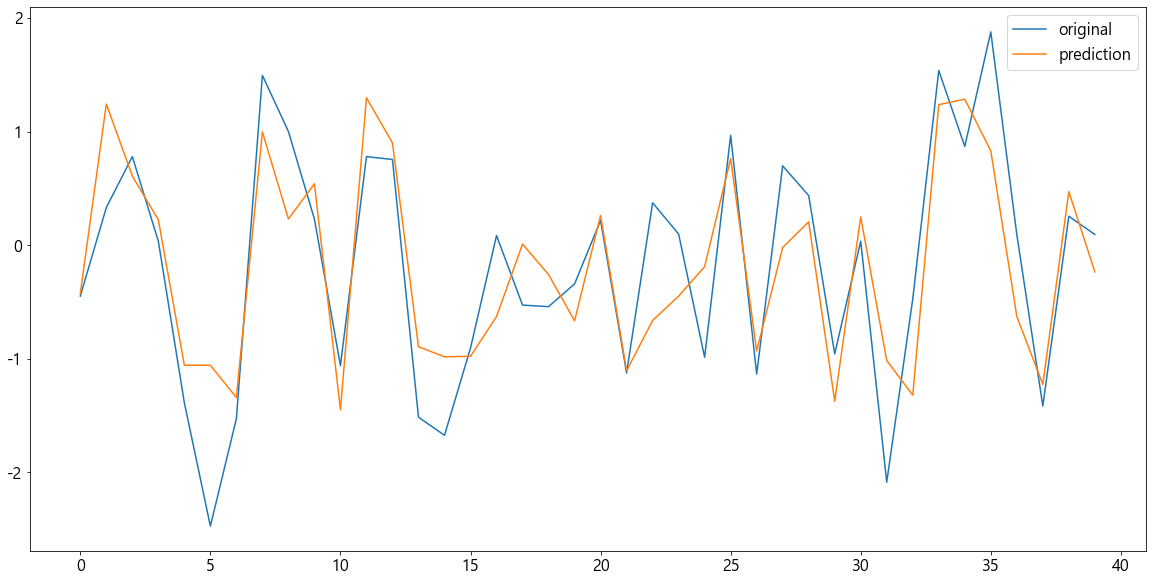

In [23]:
plt.plot(y, label='original')
plt.plot(y_pred, label='prediction')

plt.legend()

plt.show()

In [26]:
# 교차 검증
model2 = LinearRegression()

kfold = KFold(n_splits=10, shuffle=True, random_state=1)

r1 = cross_val_score(model2, X, y, scoring='neg_mean_squared_error', cv=kfold)
r2 = cross_val_score(model2, X, y, scoring='r2', cv=kfold)

display(r1.mean())
display(r2.mean())

-0.3645458796480712

0.11328621026484162

In [28]:
# 동시에 여러 지표 확인
s1 = ['neg_mean_squared_error', 'r2']
r2 = cross_validate(model2, X, y, scoring=s1, cv=kfold)

print(r2['test_neg_mean_squared_error'].mean())
print(r2['test_r2'].mean())

-0.3645458796480712
0.11328621026484162
